# Diabetics prediction using logistic regression
predicting whether the person is having diabetics or not

FEATURES INFORMATION

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1)

## Load data from file connected to the IBM Watson Studio project

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

import os, types
import pandas as pd
from botocore.client import Config

import random

In [6]:
df = pd.read_csv(r'diabetes2.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Data Understanding

In [7]:
df.shape

(768, 9)

In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=True) # drop duplikates

In [9]:
df.shape # it seams that there weren't any duplikates

(768, 9)

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the description, we can see that the min value for the features such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI equals 0, which suggests a lack of data. This implies the cleaning process.

2. Data pre-processing: dealing with missing values.

In [12]:
df.isnull().sum() #checking if the there are any null values in the database

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
(df==0).sum() #count 0 in the dataset of each features

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

The features Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age has to be different than 0

In [14]:
import numpy as np
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
for i in features: 
    df[i] = df[i].replace(0, np.nan)
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [15]:
df.shape

(392, 9)

2. Pairwise correlation

Pregnancies vs Glucose

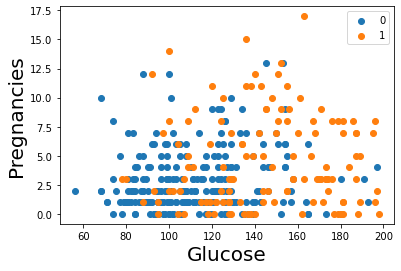

In [26]:
groups = df.groupby('Outcome')
for name, group in groups:
    plt.scatter(group['Glucose'], group['Pregnancies'], label=name)

plt.xlabel('Glucose', fontsize = 20)
plt.ylabel('Pregnancies', fontsize = 20)

plt.legend()
plt.show()

Pregnancies vs BloodPressure

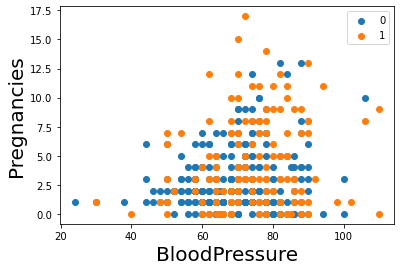

In [27]:
groups = df.groupby('Outcome')
for name, group in groups:
    plt.scatter(group['BloodPressure'], group['Pregnancies'], label=name)
plt.xlabel('BloodPressure', fontsize = 20)
plt.ylabel('Pregnancies', fontsize = 20)

plt.legend()
plt.show()

Pregnancies vs SkinThickness

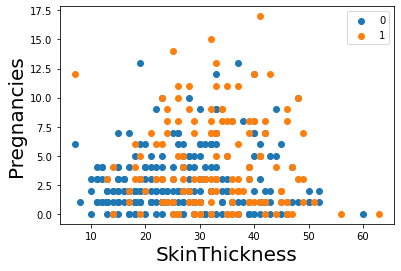

In [28]:
groups = df.groupby('Outcome')
for name, group in groups:
    plt.scatter(group['SkinThickness'], group['Pregnancies'], label=name)
plt.xlabel('SkinThickness', fontsize = 20)
plt.ylabel('Pregnancies', fontsize = 20)

plt.legend()
plt.show()

Pregnancies vs Insulin

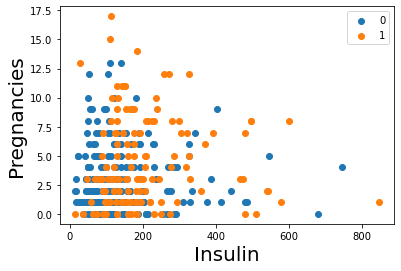

In [29]:
groups = df.groupby('Outcome')
for name, group in groups:
    plt.scatter(group['Insulin'], group['Pregnancies'], label=name)
plt.xlabel('Insulin', fontsize = 20)
plt.ylabel('Pregnancies', fontsize = 20)

plt.legend()
plt.show()

Pregnancies vs BMI

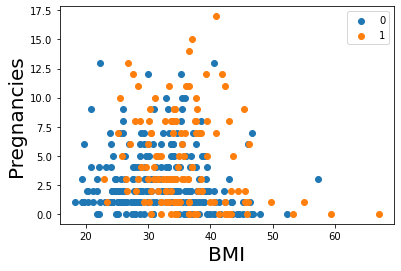

In [30]:
groups = df.groupby('Outcome')
for name, group in groups:
    plt.scatter(group['BMI'], group['Pregnancies'], label=name)
plt.xlabel('BMI', fontsize = 20)
plt.ylabel('Pregnancies', fontsize = 20)

plt.legend()
plt.show()

3. How many people are with positive outcomes?

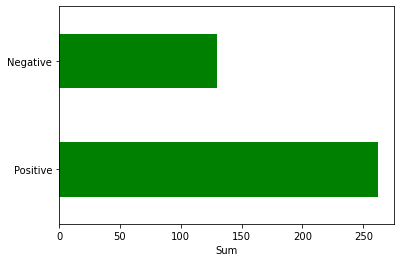

In [31]:
fig = df.Outcome.value_counts().plot(kind='barh', color='green')
fig.set_xlabel('Sum')
fig.set_yticklabels(['Positive', 'Negative'])
plt.show()

4. Remove Outliers based on the box plot

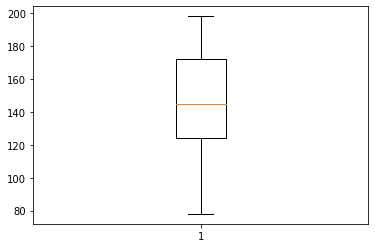

In [32]:
plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()

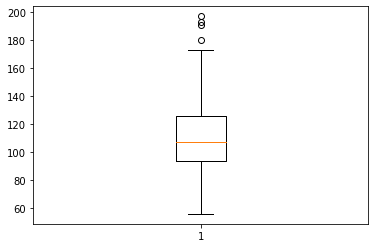

In [33]:
plt.boxplot(df[df.Outcome == 0].Glucose) #, showfliers=False
plt.show()

In [34]:
df[df.Outcome == 0].Glucose.describe()

count    262.000000
mean     111.431298
std       24.642133
min       56.000000
25%       94.000000
50%      107.500000
75%      126.000000
max      197.000000
Name: Glucose, dtype: float64

In [35]:
Q1 = df[df.Outcome == 0].Glucose.quantile(0.25)
Q3 = df[df.Outcome == 0].Glucose.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.Glucose < (Q1 - 1.5 * IQR)) |(df.Glucose > (Q3 + 1.5 * IQR))) & (df.Outcome == 0))
df = df[~filter]
df.shape # afer deleting the fliers

(388, 9)

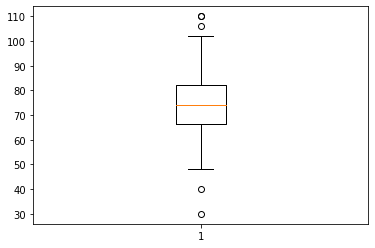

In [36]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [37]:
Q1 = df[df.Outcome == 1].BloodPressure.quantile(0.25)
Q3 = df[df.Outcome == 1].BloodPressure.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q3 + 1.5 * IQR))) & (df.Outcome == 1))
df = df[~filter]
df.shape

(383, 9)

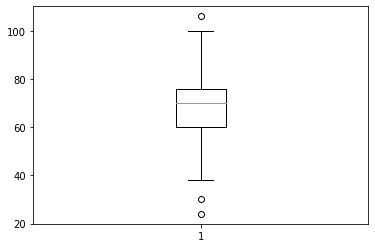

In [38]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [39]:
Q1 = df[df.Outcome == 0].BloodPressure.quantile(0.25)
Q3 = df[df.Outcome == 0].BloodPressure.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q3 + 1.5 * IQR))) & (df.Outcome == 0))
df = df[~filter]
df.shape

(380, 9)

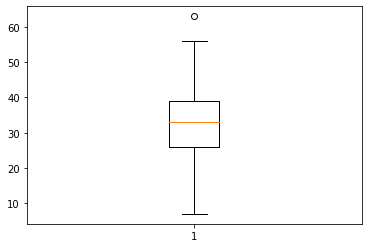

In [40]:
plt.boxplot(df[df.Outcome == 1].SkinThickness)
plt.show()

In [41]:
Q1 = df[df.Outcome == 1].SkinThickness.quantile(0.25)
Q3 = df[df.Outcome == 1].SkinThickness.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.SkinThickness < (Q1 - 1.5 * IQR)) |(df.SkinThickness > (Q3 + 1.5 * IQR))) & (df.Outcome == 1))
df = df[~filter]
df.shape

(379, 9)

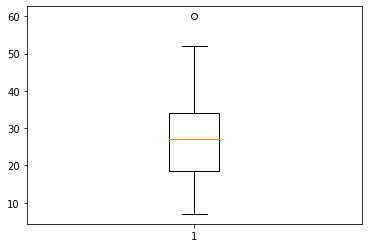

In [42]:
plt.boxplot(df[df.Outcome == 0].SkinThickness)
plt.show()

In [43]:
Q1 = df[df.Outcome == 0].SkinThickness.quantile(0.25)
Q3 = df[df.Outcome == 0].SkinThickness.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.SkinThickness < (Q1 - 1.5 * IQR)) |(df.SkinThickness > (Q3 + 1.5 * IQR))) & (df.Outcome == 0))
df = df[~filter]
df.shape

(378, 9)

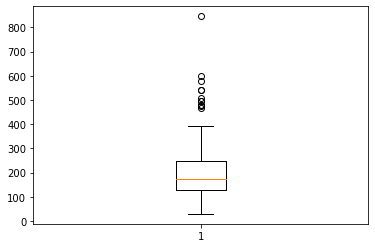

In [44]:
plt.boxplot(df[df.Outcome == 1].Insulin)
plt.show()

In [45]:
Q1 = df[df.Outcome == 1].Insulin.quantile(0.25)
Q3 = df[df.Outcome == 1].Insulin.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.Insulin < (Q1 - 1.5 * IQR)) |(df.Insulin > (Q3 + 1.5 * IQR))) & (df.Outcome == 1))
df = df[~filter]
df.shape

(366, 9)

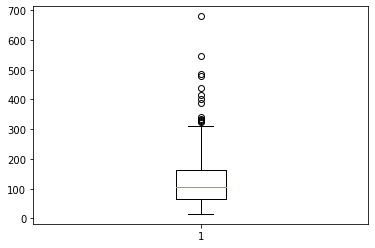

In [46]:
plt.boxplot(df[df.Outcome == 0].Insulin)
plt.show()

In [47]:
Q1 = df[df.Outcome == 0].Insulin.quantile(0.25)
Q3 = df[df.Outcome == 0].Insulin.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.Insulin < (Q1 - 1.5 * IQR)) |(df.Insulin > (Q3 + 1.5 * IQR))) & (df.Outcome == 0))
df = df[~filter]
df.shape

(353, 9)

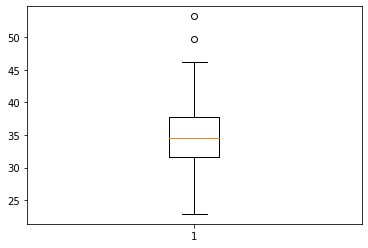

In [48]:
plt.boxplot(df[df.Outcome == 1].BMI)
plt.show()

In [49]:
Q1 = df[df.Outcome == 1].BMI.quantile(0.25)
Q3 = df[df.Outcome == 1].BMI.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.BMI < (Q1 - 1.5 * IQR)) |(df.BMI > (Q3 + 1.5 * IQR))) & (df.Outcome == 1))
df = df[~filter]
df.shape

(351, 9)

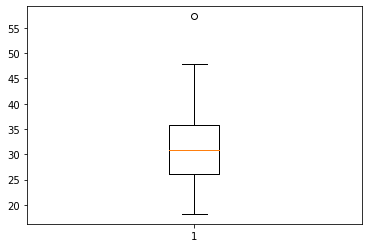

In [50]:
plt.boxplot(df[df.Outcome == 0].BMI)
plt.show()

In [51]:
Q1 = df[df.Outcome == 0].BMI.quantile(0.25)
Q3 = df[df.Outcome == 0].BMI.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (((df.BMI < (Q1 - 1.5 * IQR)) |(df.BMI > (Q3 + 1.5 * IQR))) & (df.Outcome == 0))
df = df[~filter]
df.shape

(350, 9)

5. Modle

a) separate dataset.

In [52]:
X = df.drop(columns = 'Outcome', axis = 1)
Y = df.Outcome

print(X.head(),Y.head())

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
6             3     78.0           50.0           32.0     88.0  31.0   
14            5    166.0           72.0           19.0    175.0  25.8   
16            0    118.0           84.0           47.0    230.0  45.8   
19            1    115.0           70.0           30.0     96.0  34.6   

    DiabetesPedigreeFunction  Age  
3                      0.167   21  
6                      0.248   26  
14                     0.587   51  
16                     0.551   31  
19                     0.529   32   3     0
6     1
14    1
16    1
19    1
Name: Outcome, dtype: int64


b) Standarization data

In [53]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)

In [54]:
X = Standard_data
print(X)
print(Y)

[[-0.72023626 -1.04591539 -0.39883995 ... -0.68985735 -1.14062654
  -0.96890887]
 [-0.10010664 -1.42348447 -1.83981008 ... -0.22660547 -0.8702794
  -0.46606471]
 [ 0.52002298  1.59706817  0.14152385 ... -1.05726401  0.26117346
   2.04815613]
 ...
 [-0.41017145 -1.08023985 -1.11932501 ... -0.64193474  0.85860727
  -0.86834004]
 [ 2.07034704 -0.63402184  0.50176638 ...  0.07690438 -1.12727607
   3.25498213]
 [ 0.52002298  0.05246739  0.14152385 ... -0.9933672  -0.88029226
  -0.06378937]]
3      0
6      1
14     1
16     1
19     1
      ..
751    0
755    1
760    0
763    0
765    0
Name: Outcome, Length: 350, dtype: int64


b) Train Test Split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 1)

In [56]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(350, 8) (280, 8) (70, 8) (280,) (70,)


c) Logistic Regression

In [94]:
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [112]:
# Determining Accuracy Score
X_train_predict = classifier_LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)
print('Training accuracy', format(training_data_accuracy, '.3f'))

Training accuracy 0.804


In [111]:
# Test model 
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)
print('Test accuracy ', format(test_data_accuracy, '.3f'))

Test accuracy  0.814


In [74]:
# Random parson to ivestigate
person_1 = (random.randint(0, 17), random.randint(56, 198), random.randint(38, 102), random.randint(7, 52), 
      random.randint(15, 392), random.randint(18, 48),format(random.triangular(0.085, 1.699),'.6f'),  random.randint(20, 81) )
person_2 = (random.randint(0, 17), random.randint(56, 198), random.randint(38, 102), random.randint(7, 52), 
      random.randint(15, 392), random.randint(18, 48),format(random.triangular(0.085, 1.699),'.6f'),  random.randint(20, 81) )

print('The first person',person_1)
print('The second person',person_2)

The first person (11, 132, 49, 22, 167, 38, '1.467861', 59)
The second person (2, 124, 41, 34, 23, 24, '0.470722', 72)


In [97]:
# # Predicting Model
# input_data1 = (6,148,72,35,0,33.6,0.627,50) # change to random values
# input_data2 = (1,85,66,29,0,26.6,0.351,31)

#Changing Input Data As Numpy Array
input_data_array_1 = np.asarray(person_1)
input_data_array_2 = np.asarray(person_2)

# Reshape the data as we are predicting for only one instance
input_data_reshape_1 = input_data_array_1.reshape(1,-1)
input_data_reshape_2 = input_data_array_2.reshape(1,-1)

# Standardize the data
std_data_1 = scaler.transform(input_data_reshape_1)
std_data_2 = scaler.transform(input_data_reshape_2)

# Prediction
prediction_1 = classifier_LR.predict(std_data_1)
prediction_2 = classifier_LR.predict(std_data_2)


prediction = [prediction_1, prediction_2]
print('prediction_1: ', prediction[0], 'prediction_2: ', prediction[1])


for i, ele in enumerate(range(len(prediction))):
    if prediction[i] == 0:
        print('Person',ele, 'is not having diabetics')
    else:
        print('Person', ele, 'is having diabetics')

prediction_1:  [1] prediction_2:  [0]
Person 0 is Diabetic
Person 1 is Not Diabetic


This model can predict if the new person (outside the dataset) has/has no diabetics. 

d) During the cleaning data, we remove almost half from the dataset. That is why we will use Cross-validation to see if the result will be different.

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [102]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(classifier_LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.789 (0.046)


In [107]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(classifier_LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.790 (0.064)


In this case, we can see that the model achieved an estimated classification accuracy of about 79%, which is lower than the single run result reported previously of 78.9% (from KFold) or 80% (from accuracy_score). This may suggest that the single run result may be optimistic and that the impact from three repeats might be a better estimate of the proper mean model performance.